In [1]:
import numpy as np
import pandas as pd

**A) Choice of a dataset**

In [2]:
import cfe.regression as rgsn
r = rgsn.read_pickle('ap68.pickle')

Missing dependencies for OracleDemands.


**A) Estimate Demand System**

****a) First among these are the  𝛽 coefficients, which govern how income elastic different goods are (higher values means more elastic). These are also called Frisch elasticities.****

In [3]:
r.get_beta().sort_values()

j
matches                       0.080577
firewood & chips              0.173168
eggs                          0.184476
tea : cups                    0.198136
kerosene-other sources        0.203392
salt                          0.248073
cabbage                       0.249900
rice - other sources          0.259645
onion                         0.266709
electricity                   0.270730
brinjal                       0.279577
bidi                          0.279580
potato                        0.281006
lady's finger                 0.294742
tea : leaf                    0.300695
chillis (green)               0.317308
garlic                        0.318492
moong                         0.319545
tomato                        0.324930
milk: liquid                  0.334928
banana                        0.339692
ginger                        0.346354
sugar - other sources         0.362484
turmeric                      0.381515
wheat/atta - other sources    0.391541
dry chillies           

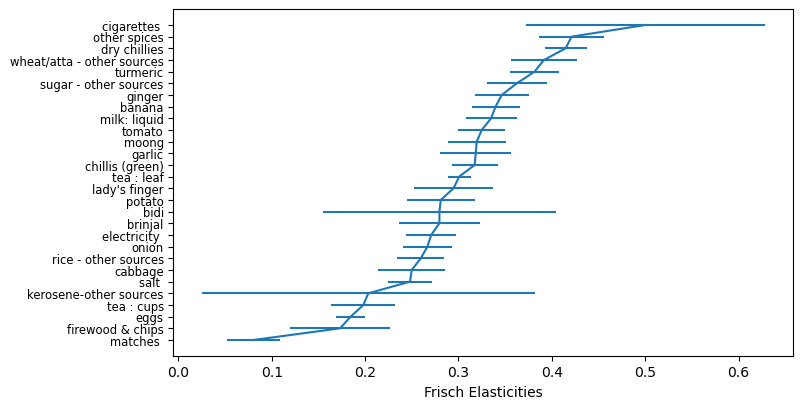

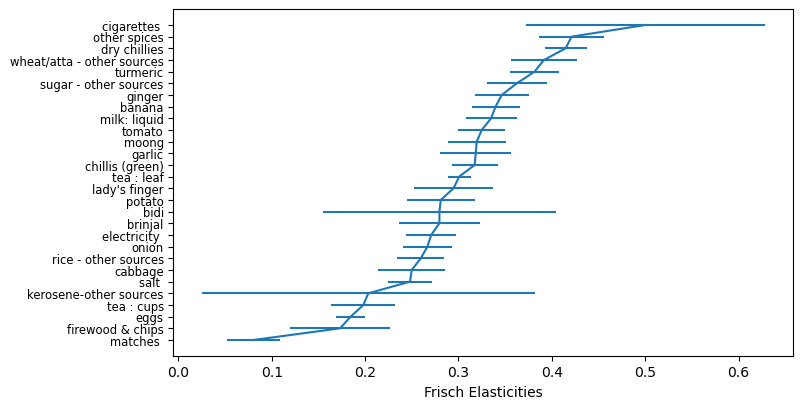

In [4]:
r.graph_beta()

**b) We are also interested in the effects of household composition on demand.  These are captured by the $\gamma_j$ parameters in the regression.**

In [5]:
## the effect of household composition on demand 
r.gamma

k,Females 0-1,Females 1-5,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 5-10,Females 50-60,Females 60-100,Males 0-1,...,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 5-10,Males 50-60,Males 60-100,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,,,,,
banana,-0.134435,-0.052761,0.009877,0.020129,0.024969,-0.006593,-0.067241,-0.052606,-0.031169,-0.057727,...,-0.027318,-0.022279,0.030212,0.027986,-0.014605,0.053039,0.039580,0.362203,-0.058643,-0.466269
bidi,-0.274315,0.149315,-0.051143,-0.057089,0.036252,0.129296,0.027558,-0.018837,0.064797,0.206975,...,0.100430,0.103666,0.094850,0.062029,0.113582,0.098680,0.127066,-0.020108,-0.153413,-0.100101
brinjal,-0.030778,-0.006442,0.016577,0.055266,0.076115,0.088468,0.009106,0.075202,0.068642,-0.008976,...,0.049727,0.061240,0.096841,0.122357,0.027184,0.170175,0.109245,0.222473,0.018115,-0.602203
cabbage,-0.015117,0.012030,0.010037,0.041544,0.053340,0.109178,-0.011785,0.114041,0.050653,0.061522,...,0.038197,0.042779,0.038743,0.082232,0.011282,0.106504,0.022229,0.219659,-0.013539,-0.562715
chillis (green),-0.090549,0.061084,0.066301,0.076201,0.116341,0.106061,0.040565,0.111292,0.079269,0.021159,...,0.075737,0.104888,0.144301,0.181906,0.087170,0.137851,0.116164,0.057140,0.020255,-0.513588
cigarettes,-0.024805,0.078772,-0.025088,0.007300,0.082727,-0.019463,-0.093219,0.034670,0.081644,0.077462,...,0.084499,0.006523,0.045108,0.122738,-0.086976,-0.076534,0.154019,-0.045407,-0.127509,-0.024958
dry chillies,-0.035057,0.028871,0.082970,0.093306,0.137437,0.120320,0.042634,0.090614,0.107973,-0.054587,...,0.105192,0.099537,0.121866,0.119215,0.113382,0.130333,0.139872,0.063761,-0.010759,-0.479856
eggs,-0.152339,0.006586,0.016125,0.064790,0.051607,0.074050,0.003237,0.044871,0.014763,-0.066105,...,0.042549,0.057775,0.083789,0.116001,0.041156,0.132128,0.137777,0.325370,-0.028410,-0.656696
electricity,-0.155862,-0.157771,-0.157336,-0.091550,-0.019233,0.053939,-0.157906,0.015810,-0.020352,-0.124089,...,-0.145529,-0.135034,-0.066792,0.098195,-0.132322,0.102106,0.084647,0.545831,-0.494713,-0.298774


**c) Counterfactual Scenarios of price changes on food demand**

In [6]:
p = np.exp(r.get_Ar())
xhat = r.predicted_expenditures()

<IPython.core.display.Javascript object>


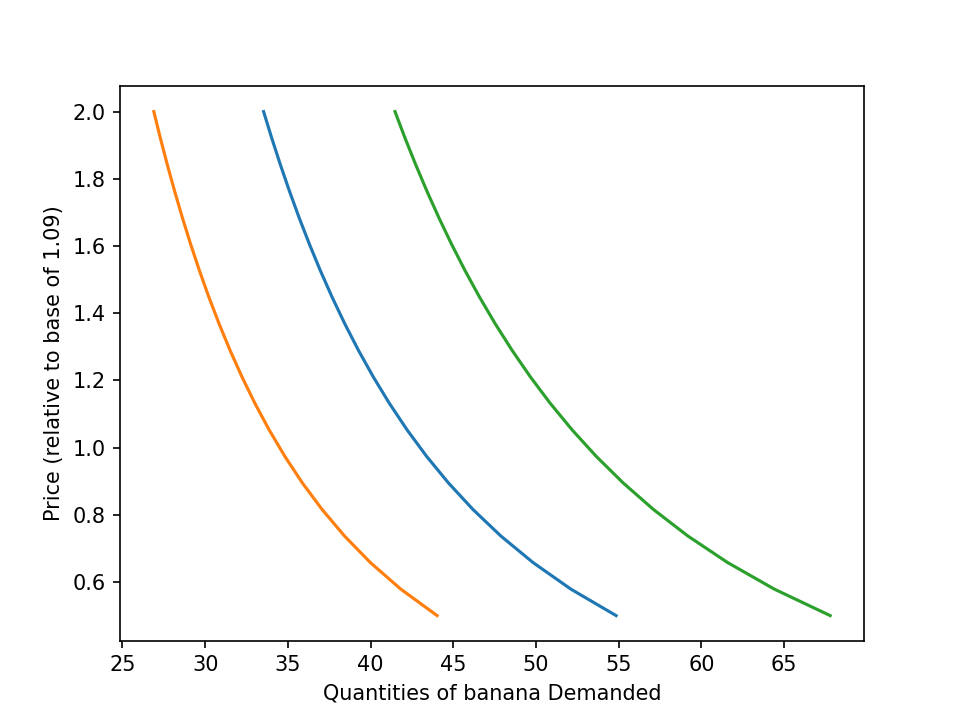

Text(0.5, 0, 'Quantities of banana Demanded')

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

use = 'banana'  # Good we want demand curve for

scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs('68',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='banana'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p


# Demand for Millet for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

**(d) Now consider plotting Engel curves (demand vs. budget) for different goods**

In [8]:
r.demands(20000,pbar).index.tolist()

['banana',
 'bidi',
 'brinjal',
 'cabbage',
 'chillis (green)',
 'cigarettes ',
 'dry chillies',
 'eggs',
 'electricity ',
 'firewood & chips',
 'garlic',
 'ginger',
 'kerosene-other sources',
 "lady's finger",
 'matches ',
 'milk: liquid',
 'moong',
 'onion',
 'other spices',
 'potato',
 'rice - other sources',
 'salt ',
 'sugar - other sources',
 'tea : cups',
 'tea : leaf',
 'tomato',
 'turmeric',
 'wheat/atta - other sources']

<IPython.core.display.Javascript object>


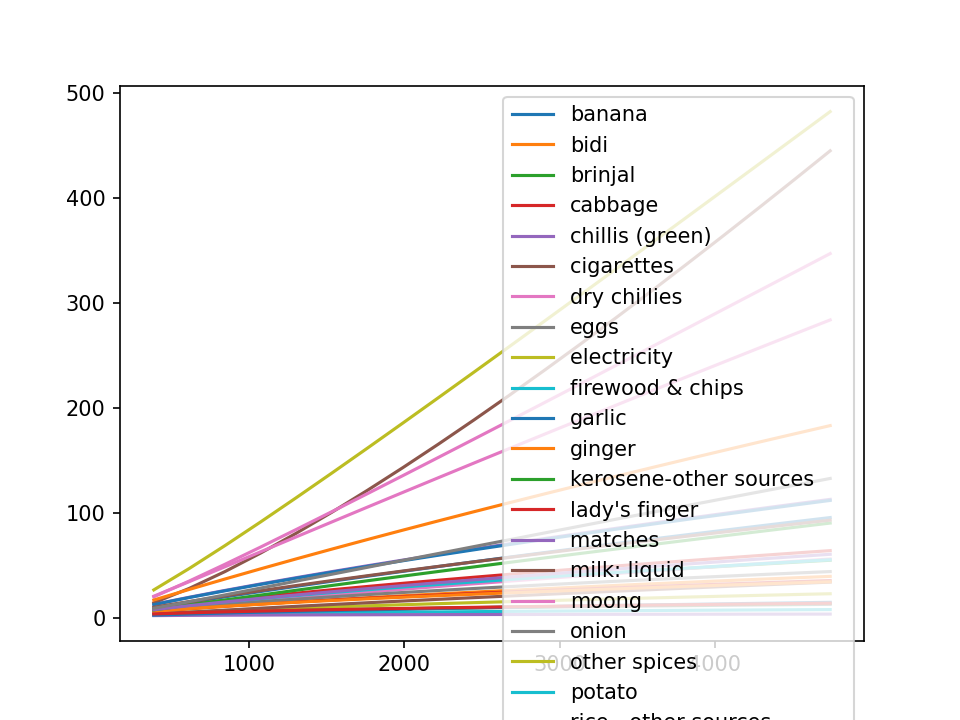

In [9]:
fig,ax = plt.subplots()

# Different budgets to evaluate demands at.
X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

ax.plot(X,[r.demands(x,pbar) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())